# <center> <strong>Diagramas de bloques y función de transferencia</strong> </center>

---


## <center> <strong>Librerías necesarias</strong> </center>

<p style='text-align: justify'>
    El módulo de <a href="https://python-control.readthedocs.io/en/">control</a> es un conjunto de liberías y funciones enfocadas a las operaciones comúnes para el análisis y diseño de los sistemas de control de realimentación. Para más detalles consultar: <a href="https://python-control.readthedocs.io/en/">https://python-control.readthedocs.io/en/</a>
<p>

<p style='text-align: justify'>
    A continuación, instalaremos las librerías <code>control</code> y <code>prettytable</code>, e importaremos las funciones necesarias de los módulos <code>control</code>, <code>matplotlib</code>, y <code>prettytable</code>.
<p>

In [1]:
from control.matlab import tf, zpk, step, series, feedback, parallel
from prettytable import PrettyTable
from util import *


## <center> <strong>Ejemplos</strong> </center>

#### ¿Cómo definir una función de transferencia en Python?

In [2]:
# Definimos una funcíon de transferencia
sys = tf(2, [1, 2, 1])

print(sys)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      2
-------------
s^2 + 2 s + 1



<p style='text-align: justify'>
    A continuación, desarrollaremos un ejemplo cuyo objetivo es simplificar el diagrama utilizando los comandos <code>series</code>, <code>parallel</code>, y <code>feedback</code>.
<p>


In [3]:
# Definimos las funciones de transferencia de cada uno de los bloques
gain = 4
transfer_function_1 = tf(1, [1, 1])
transfer_function_2 = tf([1, 0], [1, 0, 2])
feedback_function = tf([1, 0, 2], [1, 0, 0, 14])

# Realizamos las operaciones usando las funciones series y feedback
series_combination = series(transfer_function_1, transfer_function_2)
closed_loop_system = feedback(series_combination, feedback_function)
final_transfer_function = series(gain, closed_loop_system)

print(final_transfer_function)

<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                 4 s^4 + 56 s
-----------------------------------------------
s^6 + s^5 + 2 s^4 + 17 s^3 + 14 s^2 + 30 s + 28



#### Funciones de transferencia definiendo los ceros, polos y ganancia

In [4]:
# Definimos los ceros, polos y ganancia
zeros = [0, 0]
poles = [-1, -2]
gain = 10

# Creamos la función de transferencia zpk con los parámetros anteriores
sys = zpk(zeros, poles, gain)

print(sys)

<TransferFunction>: sys[8]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   10 s^2
-------------
s^2 + 3 s + 2



#### ¿Cómo graficar la respuesta al escalón de una función de transferencia?

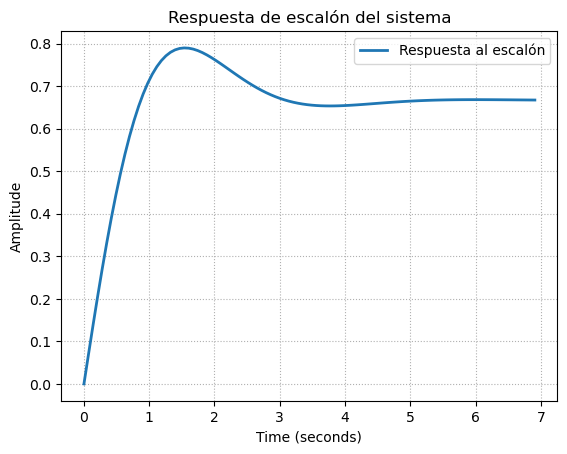

+------------------+--------------------+
|    Parameters    |       Values       |
+------------------+--------------------+
|     RiseTime     | 0.6977530584830445 |
|   SettlingTime   | 3.837641821656744  |
|   SettlingMin    | 0.619077069063666  |
|   SettlingMax    | 0.7896857951050991 |
|    Overshoot     | 18.452869265764868 |
|    Undershoot    |         0          |
|       Peak       | 0.7896857951050991 |
|     PeakTime     | 1.5350567286626977 |
| SteadyStateValue | 0.6666666666666666 |
+------------------+--------------------+


In [5]:
# Definimos la función de transferencia
sys = tf([1, 2], [1, 2, 3])

# Simulamos la respuesta de escalón de una función de transferencia
y, t = step(sys)

# Graficar la respuesta de escalón
step_plot(t, y)

# Información de la gráfica
step_info(sys)


<p style='text-align: justify'>
    
<p>